# Import Library dan Dataset

In [53]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

Cell ini berguna untuk import semua library yang dibutuhkan

In [24]:
df = pd.read_csv('dataset/nyc-rolling-sales.csv')

Cell ini berguna untuk mengambil data nyc rolling sales pada folder dataset

# Data Prepocessing

In [25]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Cell ini berguna untuk mencetak dataframe teratas

In [26]:
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


Cell ini berguna untuk mencetak dataframe terbawah

In [27]:
df.isna().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Cell ini berguna untuk melihat apakah ada nilai null pada column di dataframe

In [28]:
clean_df = df.drop(['Unnamed: 0', 'LOT', 'EASE-MENT','APARTMENT NUMBER', 'ADDRESS','ZIP CODE'], axis=1)

Cell ini berguna untuk mengeluarkan atau drop column-column yang tidak digunakan untuk membuat statistik

In [29]:
clean_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [30]:
clean_df['BOROUGH'].astype(str)

0        1
1        1
2        1
3        1
4        1
        ..
84543    5
84544    5
84545    5
84546    5
84547    5
Name: BOROUGH, Length: 84548, dtype: object

Cell ini berguna untuk membuat column borought bertipe data string

In [31]:
clean_df['BOROUGH_NAME'] = clean_df['BOROUGH'].astype(str)
clean_df['BOROUGH_NAME'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)
clean_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_NAME
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,Manhattan
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00,Manhattan
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00,Manhattan
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,Manhattan
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00,Staten Island
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00,Staten Island
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00,Staten Island
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00,Staten Island


Cell ini berguna untuk membuat column baru yaitu borough name yang dimana column tersebut berisi nama tempat dari borough

In [32]:
clean_df.replace(' -  ', 0,  inplace=True)
clean_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_NAME
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,Manhattan
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00,Manhattan
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00,Manhattan
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,Manhattan
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00,Staten Island
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00,Staten Island
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00,Staten Island
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00,Staten Island


Cell ini berguna untuk merubah seluruh data berbentuk - menjadi 0

In [33]:
clean_df.replace(np.nan,0, inplace=True)
clean_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_NAME
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,Manhattan
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00,Manhattan
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00,Manhattan
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,Manhattan
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00,Staten Island
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00,Staten Island
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00,Staten Island
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00,Staten Island


Cell ini berguna untuk mengganti data yang kosong atau null menjadi 0

# What is the statistical analysis of the NYC Rollling sales in total units between 1970 to 1980?

# Descriptive Statistics

In [34]:
clean_df.sort_values(['YEAR BUILT'], ascending=False, axis=0, inplace=True)

In [35]:
clean_df.set_index('YEAR BUILT', inplace=True)

Cell diatas berguan untuk membuat value dari year built akan menjadi increment dari terbesar sampai terkencil dan menjadikan year built sebagai index

In [36]:
clean_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_NAME
YEAR BUILT,,,,,,,,,,,,,,,,
2017,1,FASHION,25 LUXURY HOTELS,4,762,H1,0,422,422,12344,0,4,H1,0,2017-03-06 00:00:00,Manhattan
2017,1,FASHION,31 COMMERCIAL VACANT LAND,4,762,H1,0,422,422,12344,0,4,V1,0,2016-09-16 00:00:00,Manhattan
2017,3,SPRING CREEK,46 CONDO STORE BUILDINGS,4,4586,R5,0,1,1,0,0,4,RK,0,2017-01-13 00:00:00,Brooklyn
2017,2,MOTT HAVEN/PORT MORRIS,07 RENTALS - WALKUP APARTMENTS,2,2292,C7,10,1,11,2500,0,2,C7,0,2017-07-21 00:00:00,Bronx
2017,4,SPRINGFIELD GARDENS,02 TWO FAMILY DWELLINGS,1,12281,B3,2,0,2,4235,1387,1,B3,870000,2017-07-28 00:00:00,Queens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1,UPPER EAST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,1438,R4,1,0,1,0,0,2,R4,0,2016-09-09 00:00:00,Manhattan
0,1,UPPER EAST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,1438,R4,1,0,1,0,0,2,R4,1740000,2017-05-26 00:00:00,Manhattan
0,1,UPPER EAST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,1438,R4,1,0,1,0,0,2,R4,2150000,2017-07-19 00:00:00,Manhattan


In [37]:
clean_df.loc[1980:1970]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_NAME
YEAR BUILT,,,,,,,,,,,,,,,,
1980,5,NEW DORP,01 ONE FAMILY DWELLINGS,1,4229,A5,1,0,1,3038,1824,1,A5,0,2017-05-10 00:00:00,Staten Island
1980,5,NEW SPRINGVILLE,02 TWO FAMILY DWELLINGS,1,2389,B9,2,0,2,4050,2288,1,B9,0,2017-06-20 00:00:00,Staten Island
1980,5,NEW DORP,02 TWO FAMILY DWELLINGS,1,4251,B9,2,0,2,3000,1760,1,B9,625000,2016-11-03 00:00:00,Staten Island
1980,5,NEW DORP,02 TWO FAMILY DWELLINGS,1,4251,B9,2,0,2,2800,1960,1,B9,0,2017-04-24 00:00:00,Staten Island
1980,4,ELMHURST,03 THREE FAMILY DWELLINGS,1,1352,C0,3,0,3,2184,1942,1,C0,900000,2017-06-29 00:00:00,Queens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,1,UPPER WEST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,1116,R4,1,0,1,0,0,2,R4,1260000,2016-09-29 00:00:00,Manhattan
1970,1,UPPER WEST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,1116,R4,1,0,1,0,0,2,R4,3050000,2016-11-10 00:00:00,Manhattan
1970,5,PRINCES BAY,01 ONE FAMILY DWELLINGS,1,6677,A1,1,0,1,5000,2408,1,A1,620000,2017-01-12 00:00:00,Staten Island


In [38]:
df_chg = clean_df.loc[1980:1970]

Cell diatas berguna untuk membuat variable baru yang berisi dataframe dari tanggal year built yaitu dari 1970 sampai 1980

In [39]:
df_chg['TOTAL UNITS'].mean()

3.878226711560045

In [40]:
df_chg['TOTAL UNITS'].median()

1.0

In [41]:
df_chg['TOTAL UNITS'].std()

58.01704325935618

In [42]:
df_chg['TOTAL UNITS'].var()

3365.977308558006

In [43]:
df_chg['BOROUGH'].mode()

0    5
Name: BOROUGH, dtype: int64

In [44]:
Q1 = clean_df['TOTAL UNITS'].quantile(0.25)
Q3 = clean_df['TOTAL UNITS'].quantile(0.75)
iqr = Q3 - Q1
print(iqr)

1.0


Cell diatas berguna untuk mencari nilai mean,median,modus,standar deviasi,variance,dan interquartile range dengan komputasi dari python

# Descriptive Statistics with Numpy

In [45]:
mean_ = np.mean(df_chg['TOTAL UNITS'])
mean_

3.878226711560045

In [46]:
median_ = np.median(df_chg['TOTAL UNITS'])
median_

1.0

In [47]:
mode_ = scipy.stats.mode(df_chg['BOROUGH'])
mode_

ModeResult(mode=5, count=1501)

In [48]:
var_ = df_chg['TOTAL UNITS'].var()
var_

3365.977308558006

In [49]:
std_ = np.std(df_chg['TOTAL UNITS'], ddof=1)
std_

58.01704325935618

In [50]:
iqr = np.quantile(df_chg['TOTAL UNITS'], [0.25, 0.75])
iqr[1] - iqr[0]

1.0

Cell diatas berguna untuk mencari nilai mean,median,modus,standar deviasi,variance,dan interquartile range dengan komputasi dari Numpy

# Inferential Statistics

## Confidence Interval in total units between 1970 to 1980

In [88]:
df_chg['TOTAL UNITS'].sum()

13822

In [89]:
mean_dfto = 3.878 
sd = 58.017       
n = 13822          
z = 1.96      

se = sd / np.sqrt(n)

Cell ini berguna untuk mendefinisikan variable-variable yang dibutuhkan untuk perhitungan CI of Mean

In [91]:
lci = mean_dfto - z* se  #lower limit of the CI
uci = mean_dfto + z* se  #upper limit of the CI
lci, uci

(2.910778603706767, 4.845221396293233)

CI adalah 2.910778603706767 and 4.845221396293233

## What is Probability Distribution of the NYC Rollling sales in total units between 1970 to 1980?

### Probability Distribution Using Normal Distribution

In [52]:
data_normal = norm.rvs(size=3365,loc=3,scale=58)

cell ini berguna untuk membuat variable baru yang didalamnya digunakan untuk perhitungan normal distribution

C:\Users\acer\AppData\Local\Temp\ipykernel_2116\1555478196.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_normal,


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

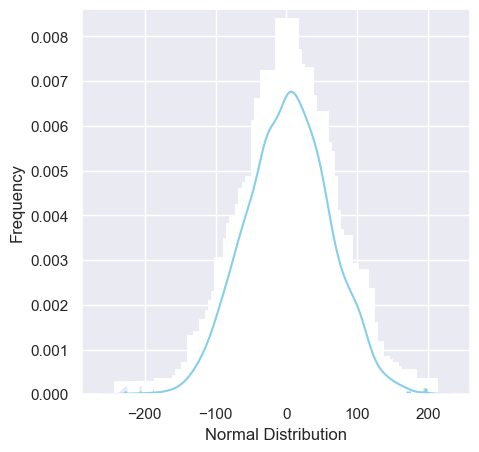

In [54]:
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

Ini adalah hasil plot Normal Distributions menggunakan Seaborn

# Is there a significant difference in sale prices between total units built before 2000 and those built from 2000?

### Hypothesis Testing using ANOVA

In [74]:
sale_prices_20s = clean_df[clean_df['TOTAL UNITS'] <= 2000]['SALE PRICE']
sale_prices_21s = clean_df[clean_df['TOTAL UNITS'] > 2000]['SALE PRICE']

Cell ini berguna untuk mendefinisikan variable untuk membuat dataframe berdasarkan total units dan sale price dari sebelum dan sesudah tahun 2000 pada dataframe

In [83]:
from scipy.stats import f_oneway

cell ini berguna untuk import library tambahan dari scipy untuk ANOVA hypothesis testing

In [87]:
stat, p = f_oneway(sale_prices_20s,sale_prices_21s )
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print("There is a significant difference in sale prices between total units built before 2000 and those built from 2000")
else:
    print("There is a significant difference in sale prices between total units built before 2000 and those built from 2000")

stat=0.005, p=0.943
There is a significant difference in sale prices between total units built before 2000 and those built from 2000


Dari hipotesis diatas kita bisa tau bahwa rata-rata dari sales price pada total unit di antara tahun sebelum 2000 dan sesudah 2000 itu mempunyai perbedaan yang cukup signifikan